In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MEASURED_WAVE_TRAIN.csv') #측정데이터(train)
df2 = pd.read_csv('/content/drive/MyDrive/REFERENCE_WAVE.csv') #정상 데이터
ans = pd.read_csv('/content/drive/MyDrive/MEASURED_WAVE_TEST.csv') #test label 없음

In [ ]:
df2['QUALITY'] = 0
df2.columns=['REFERENCE_ID','MEASURED_WAVE','QUALITY']
df = df.replace({'QUALITY' : 'GOOD'}, 0)
df1 = df.replace({'QUALITY' : 'BAD'}, 1)

df8 = df2['MEASURED_WAVE'].str.split(', ')
df5 = df8.apply(lambda x: pd.Series(x))
df5.columns=['T'+str(i) for i in range(0,200)]
df2.drop(labels=['MEASURED_WAVE'],axis=1,inplace=True)
df5.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
rev = pd.concat([df2,df5], axis = 1)

df2 = df1['MEASURED_WAVE'].str.split(', ')
df2 = df2.apply(lambda x: pd.Series(x))
df2.columns=['T'+str(i) for i in range(0,200)]
df1.drop(labels=['MEASURED_WAVE'],axis=1,inplace=True)
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3 = pd.concat([df1, df2], axis = 1)

df4 = df3.drop(labels=['REFERENCE_ID','QUALITY'],axis=1)
df4.reset_index(drop=True, inplace=True)
df4 = df4.astype('float64')
df4.columns=['Z'+str(i) for i in range(0,200)]
kur = pd.DataFrame(np.array(df4.kurt(axis='columns')).T)
kur.columns = ['kurt']
ske = pd.DataFrame(np.array(df4.skew(axis='columns')).T)
ske.columns = ['skew']
mea = pd.DataFrame(np.array(df4.mean(axis='columns')).T)
mea.columns = ['mean']
var = pd.DataFrame(np.array(df4.var(axis='columns')).T)
var.columns = ['var']
qu1 = pd.DataFrame(np.array(df4.quantile(q=0.75, axis='columns')).T)
qu1.columns = ['q1']
qu4 = pd.DataFrame(np.array(df4.quantile(q=0.25, axis='columns')).T)
qu4.columns = ['q4']
qu2 = pd.DataFrame(np.array(df4.min( axis='columns')).T)
qu2.columns=['min']
qu3 = pd.DataFrame(np.array(df4.max( axis='columns')).T)
qu3.columns=['max']
for i in range(0,199,10):
  qu3['W'+str(i)] = (df4['Z'+str(i+9)] - df4['Z'+str(i)]) / 10
df4 = pd.concat([ske,qu2,qu3], axis = 1)

ans1 = ans['MEASURED_WAVE'].str.split(', ')
ans1 = ans1.apply(lambda x: pd.Series(x))
ans1.columns=['T'+str(i) for i in range(0,200)]
ans.reset_index(drop=True, inplace=True)
ans1.reset_index(drop=True, inplace=True)
ans2 = pd.concat([ans, ans1], axis = 1)
ans2.drop(labels=['MEASURED_WAVE','INDEX'],axis=1,inplace=True)

ans3 = ans2.drop(labels=['REFERENCE_ID'],axis=1)
ans3.reset_index(drop=True, inplace=True)
ans3 = ans3.astype('float64')
ans3.columns=['Z'+str(i) for i in range(0,200)]
kur = pd.DataFrame(np.array(ans3.kurt(axis='columns')).T)
kur.columns = ['kurt']
ske = pd.DataFrame(np.array(ans3.skew(axis='columns')).T)
ske.columns = ['skew']
mea = pd.DataFrame(np.array(ans3.mean(axis='columns')).T)
mea.columns = ['mean']
var = pd.DataFrame(np.array(ans3.var(axis='columns')).T)
var.columns = ['var']
qu1 = pd.DataFrame(np.array(ans3.quantile(q=0.75, axis='columns')).T)
qu1.columns = ['q1']
qu4 = pd.DataFrame(np.array(ans3.quantile(q=0.25, axis='columns')).T)
qu4.columns = ['q4']
qu2 = pd.DataFrame(np.array(ans3.min(axis='columns')).T)
qu2.columns=['min']
qu3 = pd.DataFrame(np.array(ans3.max(axis='columns')).T)
qu3.columns=['max']
for i in range(0,199,10):
  qu3['W'+str(i)] = (ans3['Z'+str(i+9)] - ans3['Z'+str(i)]) / 10
ans3 = pd.concat([ske,qu2,qu3], axis = 1)

t = list(df3['REFERENCE_ID'].unique())
df9 = pd.DataFrame()
for i in range(len(t)):
  d1 = df3[df3['REFERENCE_ID']==t[i]]
  d3 = rev[rev['REFERENCE_ID']==t[i]]
  d1.drop(labels=['REFERENCE_ID','QUALITY'],axis=1,inplace=True)
  d3.drop(labels=['REFERENCE_ID','QUALITY'],axis=1,inplace=True)
  df8 = pd.DataFrame()
  for i in range(len(d1.index)):
    df8 = df8.append(d3, ignore_index = True)
  df8.index = d1.index
  d1 = d1.astype('float64')
  df8 = df8.astype('float64')
  d2 = d1.sub(df8)
  df9 = pd.concat([df9,d2])

df10 = df9.sort_index(ascending=True)
kur = pd.DataFrame(np.array(df10.sum(axis='columns')).T)
kur.columns = ['sum1']
ske = pd.DataFrame(np.array(df10.mean(axis='columns')).T)
ske.columns = ['mean1']
v = pd.DataFrame(np.array(df10.std(axis='columns')).T)
v.columns = ['var1']
#df10 = df10.abs()
s = pd.DataFrame(np.array(df10.quantile(q=0.25, axis='columns')).T)
s.columns = ['q1']
t = pd.DataFrame(np.array(df10.quantile(q=0.75, axis='columns')).T)
t.columns = ['q4']
hello = df3[['REFERENCE_ID', 'QUALITY']]

x_data = pd.concat([hello, df10, df4, kur, ske, v, t, s], axis=1)

t = list(ans2['REFERENCE_ID'].unique())
df9 = pd.DataFrame()
for i in range(len(t)):
  d1 = ans2[ans2['REFERENCE_ID']==t[i]]
  d3 = rev[rev['REFERENCE_ID']==t[i]]
  d1.drop(labels=['REFERENCE_ID'],axis=1,inplace=True)
  d3.drop(labels=['REFERENCE_ID','QUALITY'],axis=1,inplace=True)
  df8 = pd.DataFrame()
  for i in range(len(d1.index)):
    df8 = df8.append(d3, ignore_index = True)
  df8.index = d1.index
  d1 = d1.astype('float64')
  df8 = df8.astype('float64')
  d2 = d1.sub(df8)
  df9 = pd.concat([df9,d2])

df9 = df9.sort_index(ascending=True)

v = pd.DataFrame(np.array(df9.std(axis='columns')).T)
v.columns = ['var1']
s = pd.DataFrame(np.array(df9.quantile(q=0.25, axis='columns')).T)
s.columns = ['q1']
t = pd.DataFrame(np.array(df9.quantile(q=0.75, axis='columns')).T)
t.columns = ['q4']
#df9 = df9.abs()
kur = pd.DataFrame(np.array(df9.sum(axis='columns')).T)
kur.columns = ['sum1']
ske = pd.DataFrame(np.array(df9.mean(axis='columns')).T)
ske.columns = ['mean1']
df9 = pd.concat([df9, ans3, kur, ske, v, t, s], axis=1)

df9.reset_index(drop=True, inplace=True)
x_data.reset_index(drop=True, inplace=True)
df9['sub'] = df9['max'] - df9['min']
x_data['sub'] = x_data['max'] - x_data['min']
x_data.drop(labels=['min'], axis=1, inplace=True)
df9.drop(labels=['min'], axis=1, inplace=True)

x_data.drop(labels=['REFERENCE_ID'], axis=1, inplace=True)

y_train = x_data.iloc[:, 0:1]
X_train = x_data.drop(['QUALITY'], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = X_train
y = y_train
tsne = TSNE(random_state = 42, n_components=2, perplexity=40, n_iter=1500, learning_rate=300).fit_transform(X)
y_label = y.astype(str)
plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [ ]:
y_train = y_train.astype('int')

In [ ]:
q = pd.DataFrame(tsne)
df1 = pd.concat([q, y_train], axis = 1)
from sklearn.manifold import TSNE
import plotly.express as px
fig = px.scatter(
    df1, x=0, y=1,
    color = 'QUALITY'
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE
fig = px.scatter(
    df1, x=0, y=1,
    color = 'QUALITY'
)
fig.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import *
from imblearn.combine import *

svm = SMOTETomek(random_state=1, n_jobs=-1)
X_train, y_train = svm.fit_resample(X_train,y_train)


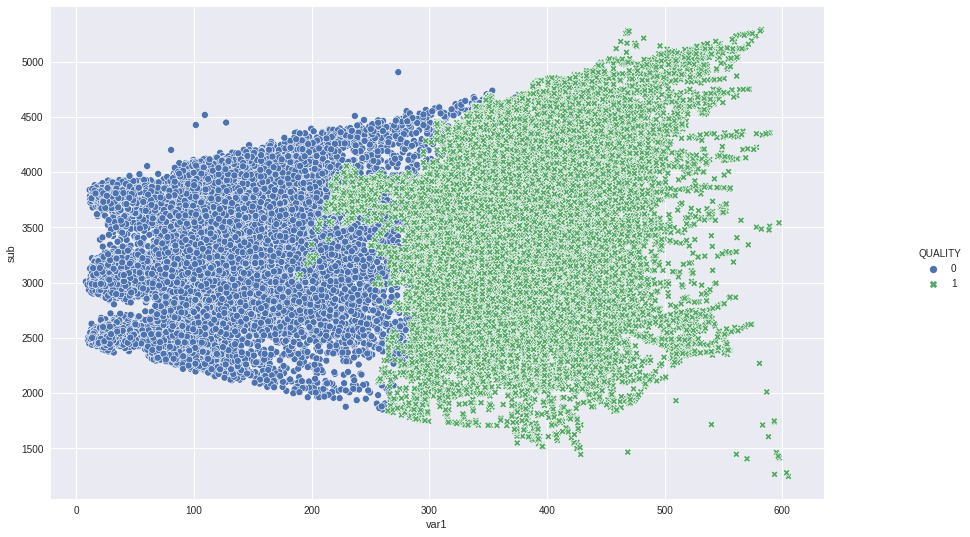

In [ ]:
tt = pd.concat([X_train, y_train], axis=1)
sns.relplot(x="var1", y="sub", hue="QUALITY", style="QUALITY",
            data=tt)
plt.gcf().set_size_inches(15, 8)

In [ ]:
pd.set_option('max_columns', 300)
X_train

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50,T51,T52,T53,T54,T55,T56,T57,T58,T59,T60,T61,T62,T63,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73,T74,T75,T76,T77,T78,T79,T80,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99,T100,T101,T102,T103,T104,T105,T106,T107,T108,T109,T110,T111,T112,T113,T114,T115,T116,T117,T118,T119,T120,T121,T122,T123,T124,T125,T126,T127,T128,T129,T130,T131,T132,T133,T134,T135,T136,T137,T138,T139,T140,T141,T142,T143,T144,T145,T146,T147,T148,T149,T150,T151,T152,T153,T154,T155,T156,T157,T158,T159,T160,T161,T162,T163,T164,T165,T166,T167,T168,T169,T170,T171,T172,T173,T174,T175,T176,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186,T187,T188,T189,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199,skew,max,W0,W10,W20,W30,W40,W50,W60,W70,W80,W90,W100,W110,W120,W130,W140,W150,W160,W170,W180,W190,sum1,mean1,var1,q4,q1,sub
0,-24.0,-26.0,-27.0,-29.0,-31.0,-33.0,-34.0,-36.0,-39.0,-41.0,-43.0,-45.0,-47.0,-50.0,-53.0,-56.0,-58.0,-61.0,-63.0,-66.0,-69.0,-73.0,-77.0,-80.0,-83.0,-86.0,-89.0,-95.0,-98.0,-102.0,-105.0,-108.0,-112.0,-116.0,-122.0,-126.0,-130.0,-133.0,-137.0,-141.0,-148.0,-151.0,-155.0,-159.0,-162.0,-166.0,-173.0,-176.0,-180.0,-183.0,-186.0,-189.0,-191.0,-197.0,-200.0,-202.0,-204.0,-207.0,-208.0,-213.0,-214.0,-215.0,-216.0,-218.0,-218.0,-219.0,-221.0,-221.0,-221.0,-221.0,-220.0,-219.0,-220.0,-219.0,-217.0,-215.0,-213.0,-211.0,-210.0,-207.0,-204.0,-201.0,-197.0,-193.0,-189.0,-186.0,-182.0,-177.0,-172.0,-167.0,-162.0,-157.0,-152.0,-146.0,-140.0,-133.0,-127.0,-121.0,-114.0,-108.0,-101.0,-94.0,-86.0,-79.0,-72.0,-64.0,-57.0,-49.0,-41.0,-34.0,-26.0,-18.0,-10.0,-3.0,5.0,13.0,21.0,28.0,36.0,44.0,51.0,59.0,66.0,73.0,80.0,87.0,94.0,101.0,108.0,114.0,120.0,126.0,132.0,137.0,143.0,149.0,153.0,157.0,162.0,167.0,171.0,175.0,177.0,180.0,184.0,186.0,189.0,191.0,193.0,193.0,194.0,196.0,196.0,197.0,197.0,194.0,194.0,193.0,192.0,191.0,190.0,188.0,182.0,180.0,178.0,175.0,172.0,169.0,161.0,158.0,154.0,150.0,147.0,143.0,134.0,129.0,125.0,120.0,116.0,111.0,106.0,98.0,94.0,90.0,86.0,82.0,79.0,72.0,69.0,66.0,62.0,59.0,57.0,54.0,49.0,47.0,44.0,42.0,39.0,37.0,-0.170833,3530.0,10.4,15.8,24.0,27.8,32.1,35.3,30.8,31.6,24.4,20.9,12.0,3.5,-5.2,-16.5,-31.3,-41.1,-55.9,-54.7,-45.7,-27.1,-4268.0,-21.340,141.241283,111.75,-152.75,3051.0
1,-55.0,-54.0,-54.0,-54.0,-54.0,-53.0,-53.0,-54.0,-54.0,-53.0,-53.0,-53.0,-52.0,-53.0,-53.0,-52.0,-51.0,-50.0,-49.0,-48.0,-48.0,-47.0,-46.0,-44.0,-43.0,-41.0,-39.0,-38.0,-36.0,-34.0,-31.0,-28.0,-26.0,-22.0,-20.0,-16.0,-13.0,-9.0,-5.0,0.0,4.0,9.0,14.0,19.0,24.0,30.0,36.0,41.0,48.0,55.0,61.0,68.0,75.0,82.0,89.0,97.0,105.0,112.0,120.0,128.0,135.0,143.0,153.0,161.0,169.0,177.0,185.0,194.0,202.0,212.0,220.0,228.0,236.0,244.0,252.0,260.0,271.0,279.0,286.0,294.0,301.0,308.0,315.0,325.0,331.0,338.0,344.0,350.0,356.0,362.0,369.0,374.0,379.0,384.0,388.0,392.0,396.0,401.0,404.0,407.0,410.0,412.0,413.0,415.0,417.0,417.0,418.0,417.0,417.0,417.0,416.0,415.0,413.0,411.0,409.0,407.0,404.0,400.0,395.0,392.0,387.0,383.0,378.0,373.0,368.0,361.0,355.0,349.0,343.0,336.0,329.0,322.0,313.0,306.0,298.0,290.0,282.0,274.0,266.0,255.0,247.0,239.0,230.0,221.0,212.0,204.0,193.0,184.0,175.0,166.0,157.0,149.0,140.0,129.0,121.0,113.0,104.0,96.0,88.0,80.0,71.0,64.0,57.0,50.0,43.0,37.0,31.0,24.0,18.0,13.0,8.0,3.0,-1.0,-5.0,-9.0,-12.0,-15.0,-18.0,-21.0,-23.0,-24.0,-26.0,-27.0,-29.0,-30.0,-31.0,-32.0,-31.0,-32.0,-32.0,-33.0,-33.0,-33.0,-33.0,-31.0,-31.0,-31.0,-30.0,-30.0,-30.0,-0.126664,3876.0,11.3,18.8,27.2,34.6,44.2,41.0,42.0,34.6,27.1,17.5,5.2,-7.2,-17.8,-31.5,-39.3,-48.7,-53.7,-53.1,-35.6,-23.0,28841.0,144.205,170.848909,313.50,-26.25,3497.0
2,-4.0,-5.0,4.0,1.0,-7.0,-11.0,10.0,18.0,13.0,6.0,3.0,-1.0,-1.0,-21.0,-23.0,-25.0,-16.0,-17.0,-22.0,-26.0,-28.0,-30.0,-30.0,-40.0,-41.0,-46.0,-39.0,-39.0,-43.0,-50.0,-53.0,-51.0,-52.0,-50.0,-54.0,-65.0,-65.0,-64.0,-60.0,-63.0,-61.0,-62.0,-55

In [ ]:
y_train

,QUALITY
0,0
1,0
2,0
3,0
4,0
...,...
27171,0
27172,1
27173,0
27174,0


In [ ]:
df2['QUALITY'] = 0
df2.columns=['REFERENCE_ID','MEASURED_WAVE','QUALITY']
df = df.replace({'QUALITY' : 'GOOD'}, 0)
df1 = df.replace({'QUALITY' : 'BAD'}, 1)

In [ ]:
df8 = df2['MEASURED_WAVE'].str.split(', ')
df5 = df8.apply(lambda x: pd.Series(x))
df5.columns=['T'+str(i) for i in range(0,200)]
df2.drop(labels=['MEASURED_WAVE'],axis=1,inplace=True)
df5.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
rev = pd.concat([df2,df5], axis = 1)

In [ ]:
rev.head()

,REFERENCE_ID,QUALITY,T0,T1,T2,T3,T4,T5,T6,T7,...,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199
0,0007acd2afeb5939,0,523,531,539,558,568,581,592,611,...,534,507,463,443,424,382,366,349,332,298
1,00086bcac49eb5c8,0,788,802,818,837,853,870,886,906,...,745,714,687,657,632,607,580,555,532,509
2,000af52c92b405e3,0,499,505,517,525,532,550,558,565,...,605,556,530,506,461,439,419,400,364,348
3,000c2fe72c452a90,0,619,633,647,660,673,686,719,737,...,698,671,643,617,592,567,541,517,469,451
4,0011089305dab0f0,0,552,560,571,580,605,613,631,656,...,575,524,497,472,431,410,386,365,333,316


In [ ]:
df2 = df1['MEASURED_WAVE'].str.split(', ')
df2 = df2.apply(lambda x: pd.Series(x))
df2.columns=['T'+str(i) for i in range(0,200)]
df1.drop(labels=['MEASURED_WAVE'],axis=1,inplace=True)
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3 = pd.concat([df1, df2], axis = 1)

In [ ]:
df4 = df3.drop(labels=['REFERENCE_ID','QUALITY'],axis=1)
df4.reset_index(drop=True, inplace=True)
df4 = df4.astype('float64')
df4.columns=['Z'+str(i) for i in range(0,200)]
kur = pd.DataFrame(np.array(df4.kurt(axis='columns')).T)
kur.columns = ['kurt']
ske = pd.DataFrame(np.array(df4.skew(axis='columns')).T)
ske.columns = ['skew']
mea = pd.DataFrame(np.array(df4.mean(axis='columns')).T)
mea.columns = ['mean']
var = pd.DataFrame(np.array(df4.var(axis='columns')).T)
var.columns = ['var']
qu1 = pd.DataFrame(np.array(df4.quantile(q=0.8, axis='columns')).T)
qu1.columns = ['q1']
qu4 = pd.DataFrame(np.array(df4.quantile(q=0.2, axis='columns')).T)
qu4.columns = ['q4']
qu2 = pd.DataFrame(np.array(df4.min( axis='columns')).T)
qu2.columns=['min']
qu3 = pd.DataFrame(np.array(df4.max( axis='columns')).T)
qu3.columns=['max']
df4 = pd.concat([ske,qu2,qu3], axis = 1)

In [ ]:
ans1 = ans['MEASURED_WAVE'].str.split(', ')
ans1 = ans1.apply(lambda x: pd.Series(x))
ans1.columns=['T'+str(i) for i in range(0,200)]
ans.reset_index(drop=True, inplace=True)
ans1.reset_index(drop=True, inplace=True)
ans2 = pd.concat([ans, ans1], axis = 1)
ans2.drop(labels=['MEASURED_WAVE','INDEX'],axis=1,inplace=True)

In [ ]:
ans3 = ans2.drop(labels=['REFERENCE_ID'],axis=1)
ans3.reset_index(drop=True, inplace=True)
ans3 = ans3.astype('float64')
ans3.columns=['Z'+str(i) for i in range(0,200)]
kur = pd.DataFrame(np.array(ans3.kurt(axis='columns')).T)
kur.columns = ['kurt']
ske = pd.DataFrame(np.array(ans3.skew(axis='columns')).T)
ske.columns = ['skew']
mea = pd.DataFrame(np.array(ans3.mean(axis='columns')).T)
mea.columns = ['mean']
var = pd.DataFrame(np.array(ans3.var(axis='columns')).T)
var.columns = ['var']
qu1 = pd.DataFrame(np.array(ans3.quantile(q=0.8, axis='columns')).T)
qu1.columns = ['q1']
qu4 = pd.DataFrame(np.array(ans3.quantile(q=0.2, axis='columns')).T)
qu4.columns = ['q4']
qu2 = pd.DataFrame(np.array(ans3.min(axis='columns')).T)
qu2.columns=['min']
qu3 = pd.DataFrame(np.array(ans3.max(axis='columns')).T)
qu3.columns=['max']
ans3 = pd.concat([ske,qu2,qu3], axis = 1)

In [ ]:
t = list(df3['REFERENCE_ID'].unique())
df9 = pd.DataFrame()
for i in range(len(t)):
  d1 = df3[df3['REFERENCE_ID']==t[i]]
  d3 = rev[rev['REFERENCE_ID']==t[i]]
  d1.drop(labels=['REFERENCE_ID','QUALITY'],axis=1,inplace=True)
  d3.drop(labels=['REFERENCE_ID','QUALITY'],axis=1,inplace=True)
  df8 = pd.DataFrame()
  for i in range(len(d1.index)):
    df8 = df8.append(d3, ignore_index = True)
  df8.index = d1.index
  d1 = d1.astype('float64')
  df8 = df8.astype('float64')
  d2 = d1.sub(df8)
  df9 = pd.concat([df9,d2])


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df9

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199
0,-24.0,-26.0,-27.0,-29.0,-31.0,-33.0,-34.0,-36.0,-39.0,-41.0,...,62.0,59.0,57.0,54.0,49.0,47.0,44.0,42.0,39.0,37.0
4452,-45.0,-32.0,-11.0,-9.0,3.0,5.0,12.0,25.0,35.0,34.0,...,-15.0,-21.0,-26.0,-30.0,-32.0,-32.0,-29.0,-25.0,-26.0,-18.0
11004,33.0,33.0,34.0,34.0,35.0,36.0,36.0,37.0,38.0,39.0,...,-9.0,-8.0,-7.0,-6.0,-4.0,-4.0,-3.0,-2.0,-1.0,-1.0
1,-55.0,-54.0,-54.0,-54.0,-54.0,-53.0,-53.0,-54.0,-54.0,-53.0,...,-33.0,-33.0,-33.0,-33.0,-31.0,-31.0,-31.0,-30.0,-30.0,-30.0
2,-4.0,-5.0,4.0,1.0,-7.0,-11.0,10.0,18.0,13.0,6.0,...,-11.0,-15.0,-13.0,-16.0,-17.0,-18.0,-21.0,-25.0,-26.0,-22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,3.0,4.0,1.0,10.0,8.0,18.0,16.0,19.0,19.0,30.0,...,23.0,33.0,28.0,26.0,35.0,31.0,27.0,24.0,18.0,29.0
27135,-11.0,-9.0,-6.0,-5.0,-7.0,7.0,8.0,30.0,22.0,28.0,...,47.0,43.0,39.0,36.0,30.0,40.0,48.0,45.0,44.0,41.0
27150,-10.0,-18.0,-6.0,0.0,5.0,13.0,6.0,2.0,-3.0,1.0,...,-2.0,-8.0,-6.0,-2.0,-4.0,-6.0,-3.0,-2.0,-3.0,-4.0
27152,13.0,11.0,13.0,12.0,10.0,7.0,2.0,9.0,13.0,9.0,...,10.0,4.0,3.0,10.0,11.0,9.0,1.0,6.0,8.0,10.0


In [ ]:
df10 = df9.sort_index(ascending=True)
s = pd.DataFrame(np.array(df10.quantile(q=0.25, axis='columns')).T)
s.columns = ['q1']
t = pd.DataFrame(np.array(df10.quantile(q=0.75, axis='columns')).T)
t.columns = ['q4']
v = pd.DataFrame(np.array(df10.std(axis='columns')).T)
v.columns = ['var1']
df11=df10.abs()
ske = pd.DataFrame(np.array(df11.mean(axis='columns')).T)
ske.columns = ['mean1']
kur = pd.DataFrame(np.array(df11.sum(axis='columns')).T)
kur.columns = ['sum1']
hello = df3[['REFERENCE_ID', 'QUALITY']]

x_data = pd.concat([hello, df10, df4,kur,ske, v], axis = 1)

In [ ]:
t = list(ans2['REFERENCE_ID'].unique())
df9 = pd.DataFrame()
for i in range(len(t)):
  d1 = ans2[ans2['REFERENCE_ID']==t[i]]
  d3 = rev[rev['REFERENCE_ID']==t[i]]
  d1.drop(labels=['REFERENCE_ID'],axis=1,inplace=True)
  d3.drop(labels=['REFERENCE_ID','QUALITY'],axis=1,inplace=True)
  df8 = pd.DataFrame()
  for i in range(len(d1.index)):
    df8 = df8.append(d3, ignore_index = True)
  df8.index = d1.index
  d1 = d1.astype('float64')
  df8 = df8.astype('float64')
  d2 = d1.sub(df8)
  df9 = pd.concat([df9,d2])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df9 = df9.sort_index(ascending=True)

v = pd.DataFrame(np.array(df9.std(axis='columns')).T)
v.columns = ['var1']
s = pd.DataFrame(np.array(df9.quantile(q=0.25, axis='columns')).T)
s.columns = ['q1']
t = pd.DataFrame(np.array(df9.quantile(q=0.75, axis='columns')).T)
t.columns = ['q4']
df10=df9.abs()
kur = pd.DataFrame(np.array(df10.sum(axis='columns')).T)
kur.columns = ['sum1']
ske = pd.DataFrame(np.array(df10.mean(axis='columns')).T)
ske.columns = ['mean1']
df9 = pd.concat([df9, ans3, kur, ske,v], axis = 1)

In [ ]:
df9.reset_index(drop=True, inplace=True)
x_data.reset_index(drop=True, inplace=True)
x_data.drop(labels=['min'],axis=1,inplace=True)
df9.drop(labels=['min'],axis=1,inplace=True)

In [ ]:
x_data.drop(labels=['REFERENCE_ID'],axis=1,inplace=True)

In [ ]:
y_train = x_data.iloc[:,0:1]
X_train = x_data.drop(['QUALITY'],axis=1)

In [ ]:
# 범위를 부여하지 않고 그래프를 그리는 함수
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def plot_prac_histo(df, col_no, bins) :
  #정상
    df_yes=df[(df['QUALITY']==0)]
    X_yes =df_yes.iloc[:,col_no].values

  # i+1번째 열 이름 선택
    col_name=df.columns[col_no]
    print(col_name)

  #불량
    df_no=df[(df['QUALITY']==1)]
    X_no = df_no.iloc[:,col_no].values

  # import matplotlib.pyplot as plt
  # plt.hist(X_yes,alpha=0.4, edgecolor='black')
  # plt.title('Goods')
  # plt.xlabel(col_name)
  # plt.ylabel('Goods count')
  # plt.show()

  # import matplotlib.pyplot as plt
  # plt.hist(X_no,alpha=0.4, edgecolor='black')
  # plt.title('Bads')
  # plt.xlabel(col_name)
  # plt.ylabel('Bads count')
  # plt.show()
    # 한글 폰트 설정
    plt.style.use('seaborn')
    plt.hist(X_yes, color = 'green', alpha = 0.3, bins = bins, label = 'good', density = True,)
    plt.hist(X_no, color = 'red', alpha = 0.4, bins = bins, label = 'bad', density = True)
    plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
    plt.gca().spines['top'].set_visible(False) #위 테두리 제거
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title(col_name, size = 17)
    plt.legend(fontsize = 16)
    plt.show()

In [ ]:
x_data.tail(10)

,QUALITY,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50,T51,T52,T53,T54,T55,T56,T57,T58,T59,T60,T61,T62,T63,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73,T74,T75,T76,T77,T78,T79,T80,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99,T100,T101,T102,T103,T104,T105,T106,T107,T108,T109,T110,T111,T112,T113,T114,T115,T116,T117,T118,T119,T120,T121,T122,T123,T124,T125,T126,T127,T128,T129,T130,T131,T132,T133,T134,T135,T136,T137,T138,T139,T140,T141,T142,T143,T144,T145,T146,T147,T148,T149,T150,T151,T152,T153,T154,T155,T156,T157,T158,T159,T160,T161,T162,T163,T164,T165,T166,T167,T168,T169,T170,T171,T172,T173,T174,T175,T176,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186,T187,T188,T189,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199,skew,max,W0,W10,W20,W30,W40,W50,W60,W70,W80,W90,W100,W110,W120,W130,W140,W150,W160,W170,W180,W190,sum1,mean1,var1,q4,q1,sub
27166,0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,3.0,4.0,5.0,7.0,8.0,10.0,12.0,14.0,15.0,18.0,20.0,22.0,24.0,27.0,30.0,32.0,36.0,39.0,41.0,45.0,49.0,52.0,56.0,59.0,65.0,69.0,73.0,79.0,83.0,87.0,92.0,99.0,103.0,108.0,113.0,120.0,125.0,131.0,139.0,144.0,149.0,155.0,163.0,168.0,173.0,181.0,187.0,192.0,197.0,206.0,210.0,215.0,220.0,228.0,233.0,237.0,245.0,249.0,253.0,257.0,264.0,268.0,271.0,274.0,280.0,283.0,286.0,291.0,293.0,295.0,297.0,301.0,302.0,303.0,304.0,307.0,307.0,307.0,308.0,307.0,306.0,304.0,304.0,302.0,300.0,299.0,296.0,293.0,290.0,287.0,284.0,280.0,275.0,272.0,267.0,262.0,257.0,252.0,246.0,241.0,235.0,229.0,222.0,216.0,209.0,202.0,195.0,188.0,181.0,173.0,166.0,158.0,150.0,142.0,134.0,126.0,118.0,109.0,101.0,93.0,84.0,76.0,68.0,59.0,51.0,43.0,35.0,27.0,19.0,11.0,3.0,-4.0,-12.0,-19.0,-26.0,-33.0,-39.0,-46.0,-52.0,-58.0,-64.0,-69.0,-75.0,-80.0,-84.0,-89.0,-93.0,-96.0,-99.0,-103.0,-106.0,-107.0,-110.0,-113.0,-115.0,-114.0,-116.0,-117.0,-115.0,-115.0,-116.0,-116.0,-112.0,-111.0,-110.0,-106.0,-104.0,-103.0,-101.0,-95.0,-94.0,-91.0,-89.0,-83.0,-81.0,-79.0,-73.0,-71.0,-69.0,-67.0,-62.0,-60.0,-58.0,-56.0,-51.0,-50.0,-48.0,-44.0,-42.0,-40.0,-39.0,-35.0,-34.0,-0.161190,4417.0,13.1,22.5,33.6,47.9,55.2,49.6,45.5,41.6,28.4,12.9,1.5,-8.8,-22.9,-34.9,-45.0,-58.9,-66.0,-59.9,-40.6,-27.2,16891.0,84.455,141.637615,220.50,-44.50,4054.0
27167,0,-125.0,-118.0,-114.0,-124.0,-137.0,-141.0,-143.0,-148.0,-159.0,-167.0,-167.0,-174.0,-178.0,-184.0,-193.0,-200.0,-205.0,-211.0,-216.0,-232.0,-238.0,-243.0,-243.0,-258.0,-261.0,-264.0,-273.0,-271.0,-276.0,-280.0,-290.0,-298.0,-301.0,-305.0,-317.0,-322.0,-327.0,-330.0,-336.0,-339.0,-342.0,-327.0,-317.0,-315.0,-310.0,-305.0,-305.0,-299.0,-298.0,-298.0,-294.0,-292.0,-290.0,-302.0,-304.0,-307.0,-308.0,-310.0,-311.0,-311.0,-296.0,-300.0,-297.0,-288.0,-291.0,-276.0,-270.0,-244.0,-250.0,-250.0,-248.0,-261.0,-267.0,-269.0,-271.0,-263.0,-264.0,-267.0,-271.0,-274.0,-275.0,-275.0,-271.0,-270.0,-269.0,-267.0,-263.0,-247.0,-246.0,-245.0,-237.0,-238.0,-241.0,-239.0,-240.0,-229.0,-215.0,-218.0,-217.0,-221.0,-222.0,-198.0,-201.0,-206.0,-210.0,-203.0,-199.0,-201.0,-188.0,-179.0,-170.0,-162.0,-169.0,-175.0,-178.0,-180.0,-185.0,-189.0,-190.0,-198.0,-195.0,-170.0,-171.0,-180.0,-181.0,-179.0,-184.0,-192.0,-188.0,-186.0,-183.0,-175.0,-174.0,-173.0,-177.0,-178.0,-175.0,-169.0,-165.0,-149.0,-151.0,-150.0,-139.0,-138.0,-134.0,-133.0,-133.0,-134.0,-134.0,-132.0,-119.0,-117.0,-121.0,-125.0,-122.0,-115.0,-108.0,-110.0,-108.0,-105.0,-104.0,-105.0,-107.0,-106.0,-110.0,-102.0,-96.0,-93.0,-92.0,-88.0,-87.0,-129.0,-89.0,-86.0,-76.0,-66.0,-68.0,-53.0,-41.0,-32.0,-32.0,-25.0,-24.0,-32.0,-34.0,-20.0,-18.0,-7.0,-2.0,-6.0,-6.0,-6.0,13.0,26.0,7.0,19.0,20.0,18.0,18.0,9.0,-0.056929,3526.0,5.5,12.0,17.9,24.2,42.8,36.9,41.2,33.2,29.2,19.7,13.7,-2.8,-11.7,-23.4,-38.8,-46.3,-54.0,-53.3,-33.3,-21.3,-37280.0,-186.400,93.758216,-123.50,-267.50,3177.0
27168,1,-167.0,-168.0,-169.0,-170.0,-171.0,-172.0,-174.0,-179.0,-180.0,-180.0,-181.0,-181.0,-182.0,-185

W70


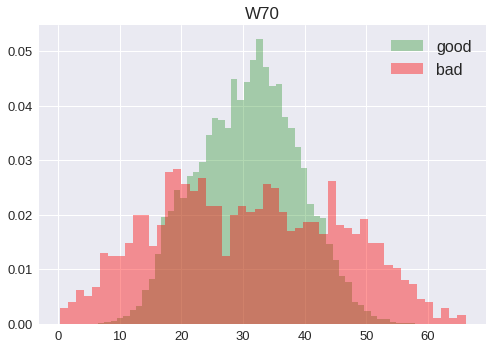

W80


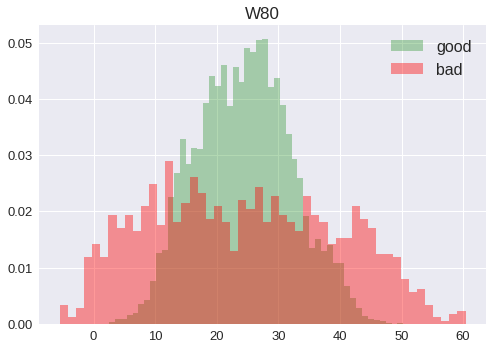

W90


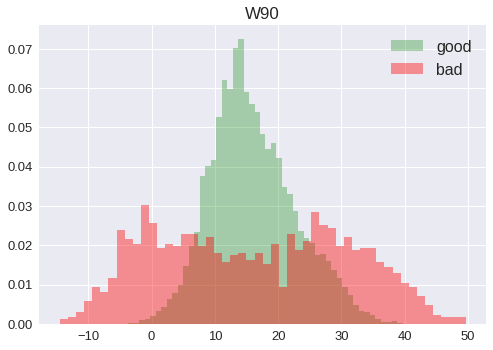

W100


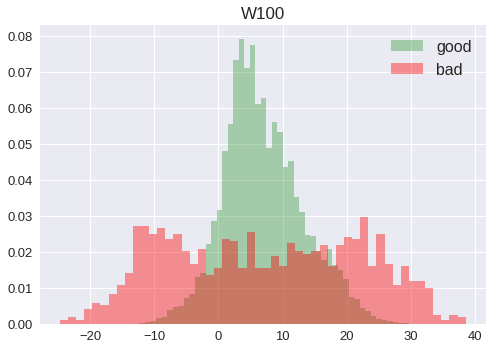

W110


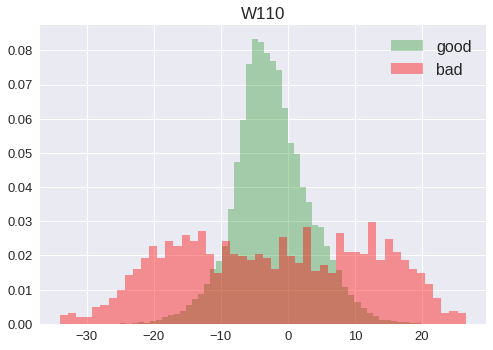

W120


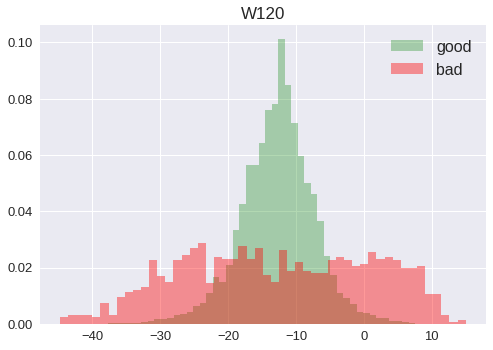

W130


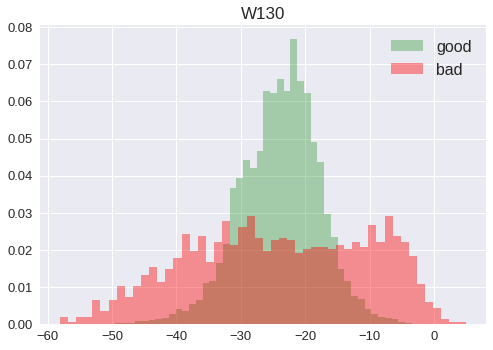

W140


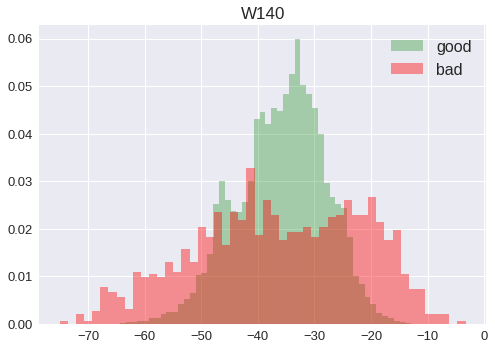

W150


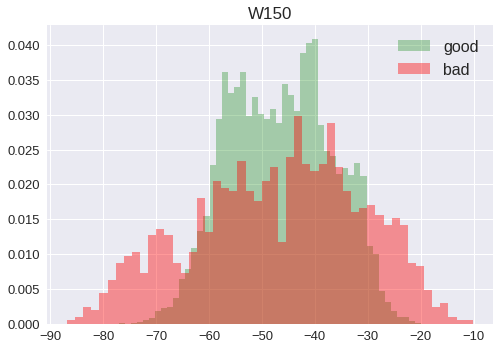

W160


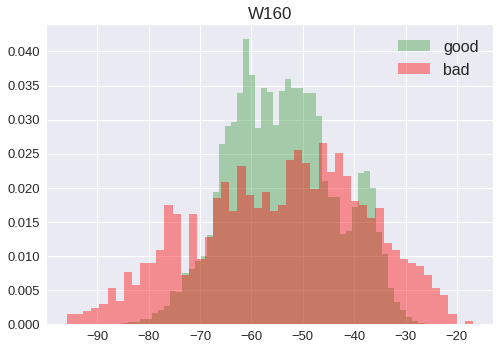

W170


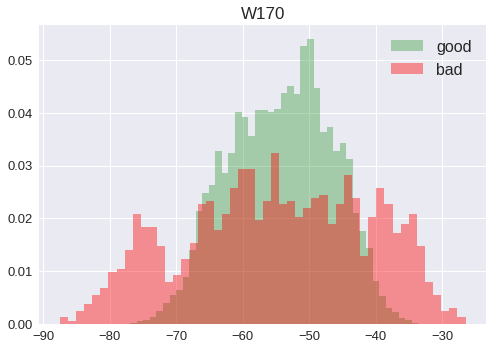

W180


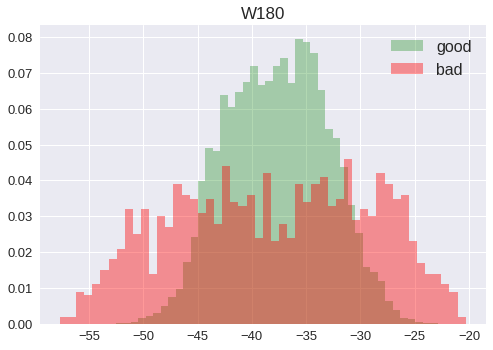

W190


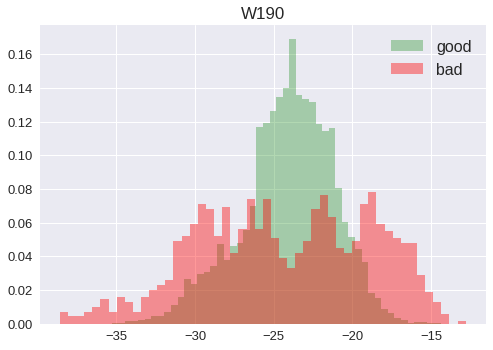

sum1


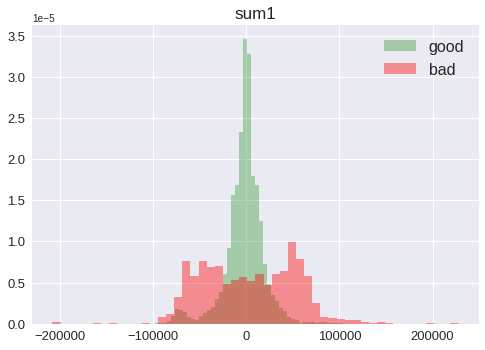

mean1


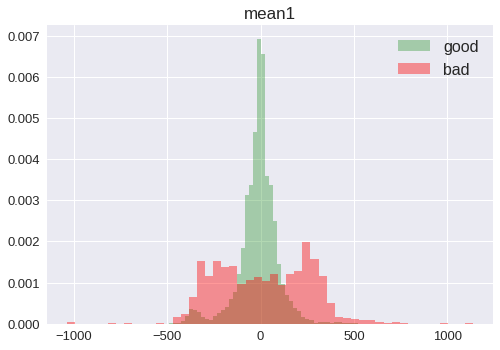

var1


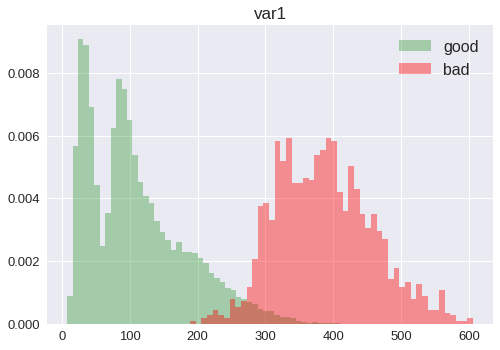

q4


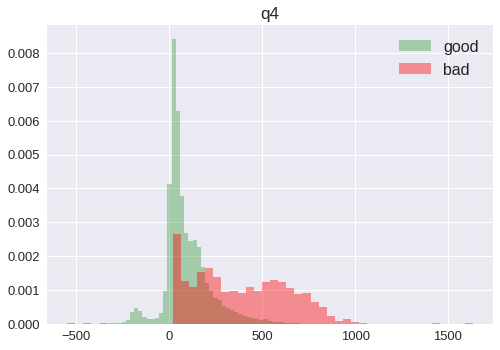

q1


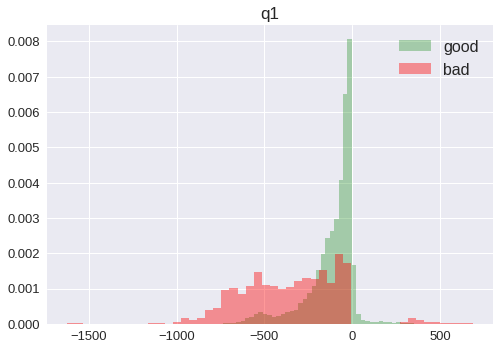

In [ ]:
for i in range(210,228):
   plot_prac_histo(x_data, i, 50)

In [ ]:
from sklearn.preprocessing import RobustScaler
robust= RobustScaler().fit(X_train)
X_train = robust.transform(X_train)
X_test = robust.transform(df9)

In [ ]:
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import *
from imblearn.combine import *
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling._smote.filter import BorderlineSMOTE

svm = SMOTETomek(random_state=1, n_jobs=-1)
X_train, y_train = svm.fit_resample(X_train,y_train)


In [ ]:
# import keras
from keras.optimizers import Adam
#from keras.optimizers import adam
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D, Dense
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss',patience=5)]
                                          
model = Sequential()

model.add(Dense(210, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(777,activation='relu'))
model.add(Dense(666,activation='relu'))
model.add(Dense(555,activation='relu'))

# model.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()
model.fit(X_train, y_train , epochs=50)
model.save("dfff.h5")

mod = load_model('dfff.h5')
a = mod(X_test)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 210)               43260     
                                                                 
 dense_1 (Dense)             (None, 777)               163947    
                                                                 
 dense_2 (Dense)             (None, 666)               518148    
                                                                 
 dense_3 (Dense)             (None, 555)               370185    
                                                                 
 dense_4 (Dense)             (None, 1)                 556       
                                                                 
Total params: 1,096,096
Trainable params: 1,096,096
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1615/1615 [========================

In [ ]:
from collections import Counter
print((a))
pred_th = [ 1 if x > 0.3 else 0 for x in a[:,0]]
print(Counter(pred_th))
#Counter({0: 2865, 1: 2489})

an = pd.read_csv('/content/drive/MyDrive/ANSWER_FORM.csv')
df = pd.DataFrame(np.array([pred_th]).T)
df.columns =['QUALITY']
df = df.replace({'QUALITY' : 1}, 'BAD')
df = df.replace({'QUALITY' : 0}, 'GOOD')
an.drop(labels=['QUALITY'],axis=1,inplace=True)
df1 = pd.concat([an, df], axis = 1)
df1.to_csv('test.csv',index = False)

tf.Tensor(
[[0.0000000e+00]
 [6.9638299e-14]
 [9.9999654e-01]
 ...
 [0.0000000e+00]
 [9.9999356e-01]
 [9.9999988e-01]], shape=(5354, 1), dtype=float32)
Counter({0: 2872, 1: 2482})


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
